## Fire in the nature park

***Problem Summary***

The administration of the nature park Montesinho in north-east Portugal wants to predict wild fires based on wheather data of the Fire-Wheather-Index (FWI). The aim is to recognize the affected area and consequently the intensity of the imminent wild fire as early as possible in order to be able to adequatly assess the danger caused by the fire. To this aim, data from 517 wild fires have been collected. The features are summarized below

***Features***

- X (X-coordinate of the fire in the park: 1 to 9)
- Y (Y-coordinate of the fire in the park: 2 to 9)
- Month month: ”jan“ to ”dec“)
- day (day: ”mon“ bis ”sun“)
- FFMC (FFMC index of the FWI system: 18.7 to 96.2)
- DMC (DMC index of the FWI system: 1.1 bis 291.3)
- DC (DC index of the system: 7.9 bis 860.6)
- ISI (ISI index of the FWI systems: 0.0 to 56.1)
- temp (temperature in degrees Celsius: 2.2 to 33.3)
- RH (relative humidity in %: 15 to 100)
- wind (wind velocity in km/h: 0.4 to 9.4)
- rain (rainfall in mm/m2: 0.0 to 6.4)
- **area (forest area that has been burnt in hectare: 0.09 to 1090.84)**

***Goal***

Predict **area** that has been burnt in hectare

Load the data into Python and preprocess them appropriately; perform an adequate normalization of the features. For example, he label area is distributed very non-uniformly such that a transformation such as area0 = log(1 + area) is appropriate. Identify and implement a suitable learning method in Python. Train and evaluate the model. Propose a trivial baseline model with which you can compare your model’s performance. Provide the RMSE (root mean square error) of your model and the baseline model obtained with 10-fold cross-validation. Provide a short documentation and motivation of each of your steps.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Path="C:\\Users\\bsubramani\\Downloads\\Python Scripts\\ML Project\\"
Path="/content/fires.csv"
Filename='fires.csv'
Data=pd.read_csv(Filename)

In [5]:
###### Functions

def renames(feature='day', nbr=12):
    Dict_cols={}
    for i in range(nbr):
        Dict_cols[i]=feature+str(i)
        print(Dict_cols[i])
    
    return Dict_cols
    

In [6]:
Data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
Data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [9]:
Data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


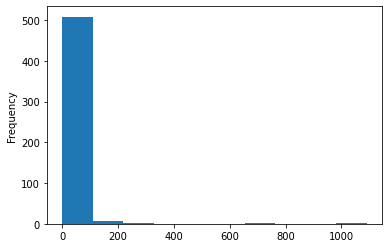

In [10]:
# Fired area in hitogram
Data["area"].plot(kind='hist', bins=10)

In [11]:
# Log Transformation
print(Data['area'].head())
Data["area"]=[ 0 if np.isinf(x) else x for x in (Data["area"]+1).apply(np.log) ]
print("#####")
print(Data['area'].head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64
#####
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64


In [15]:
Data['area'].describe()

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area, dtype: float64

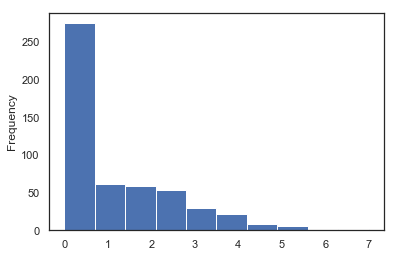

In [ ]:
Data["area"].plot(kind='hist', bins=10)

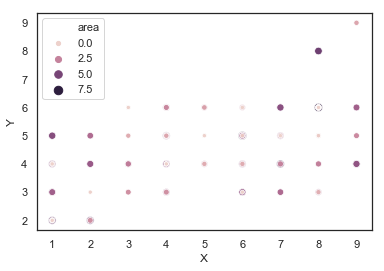

In [ ]:
sns.scatterplot(x='X', y='Y',size='area', hue='area', data=Data)

In [ ]:
#Data['X']=Data['X'].astype('object', copy=True)
#Data['Y']=Data['Y'].astype('object', copy=True)
#Data['month']=Data['month'].astype('object', copy=True)
#Data['day']=Data['day'].astype('object', copy=True)

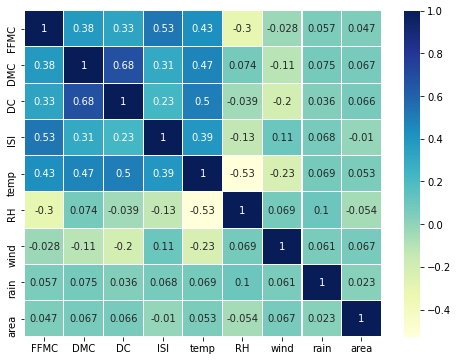

In [16]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area']
cm = np.corrcoef(Data[ncols].values.T) 
f, ax = plt.subplots(figsize =(8, 6)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

In [17]:
ncols=Encoded_Data.columns
cm = np.corrcoef(Encoded_Data.values.T) 
f, ax = plt.subplots(figsize =(12, 8)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=False,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

NameError: ignored

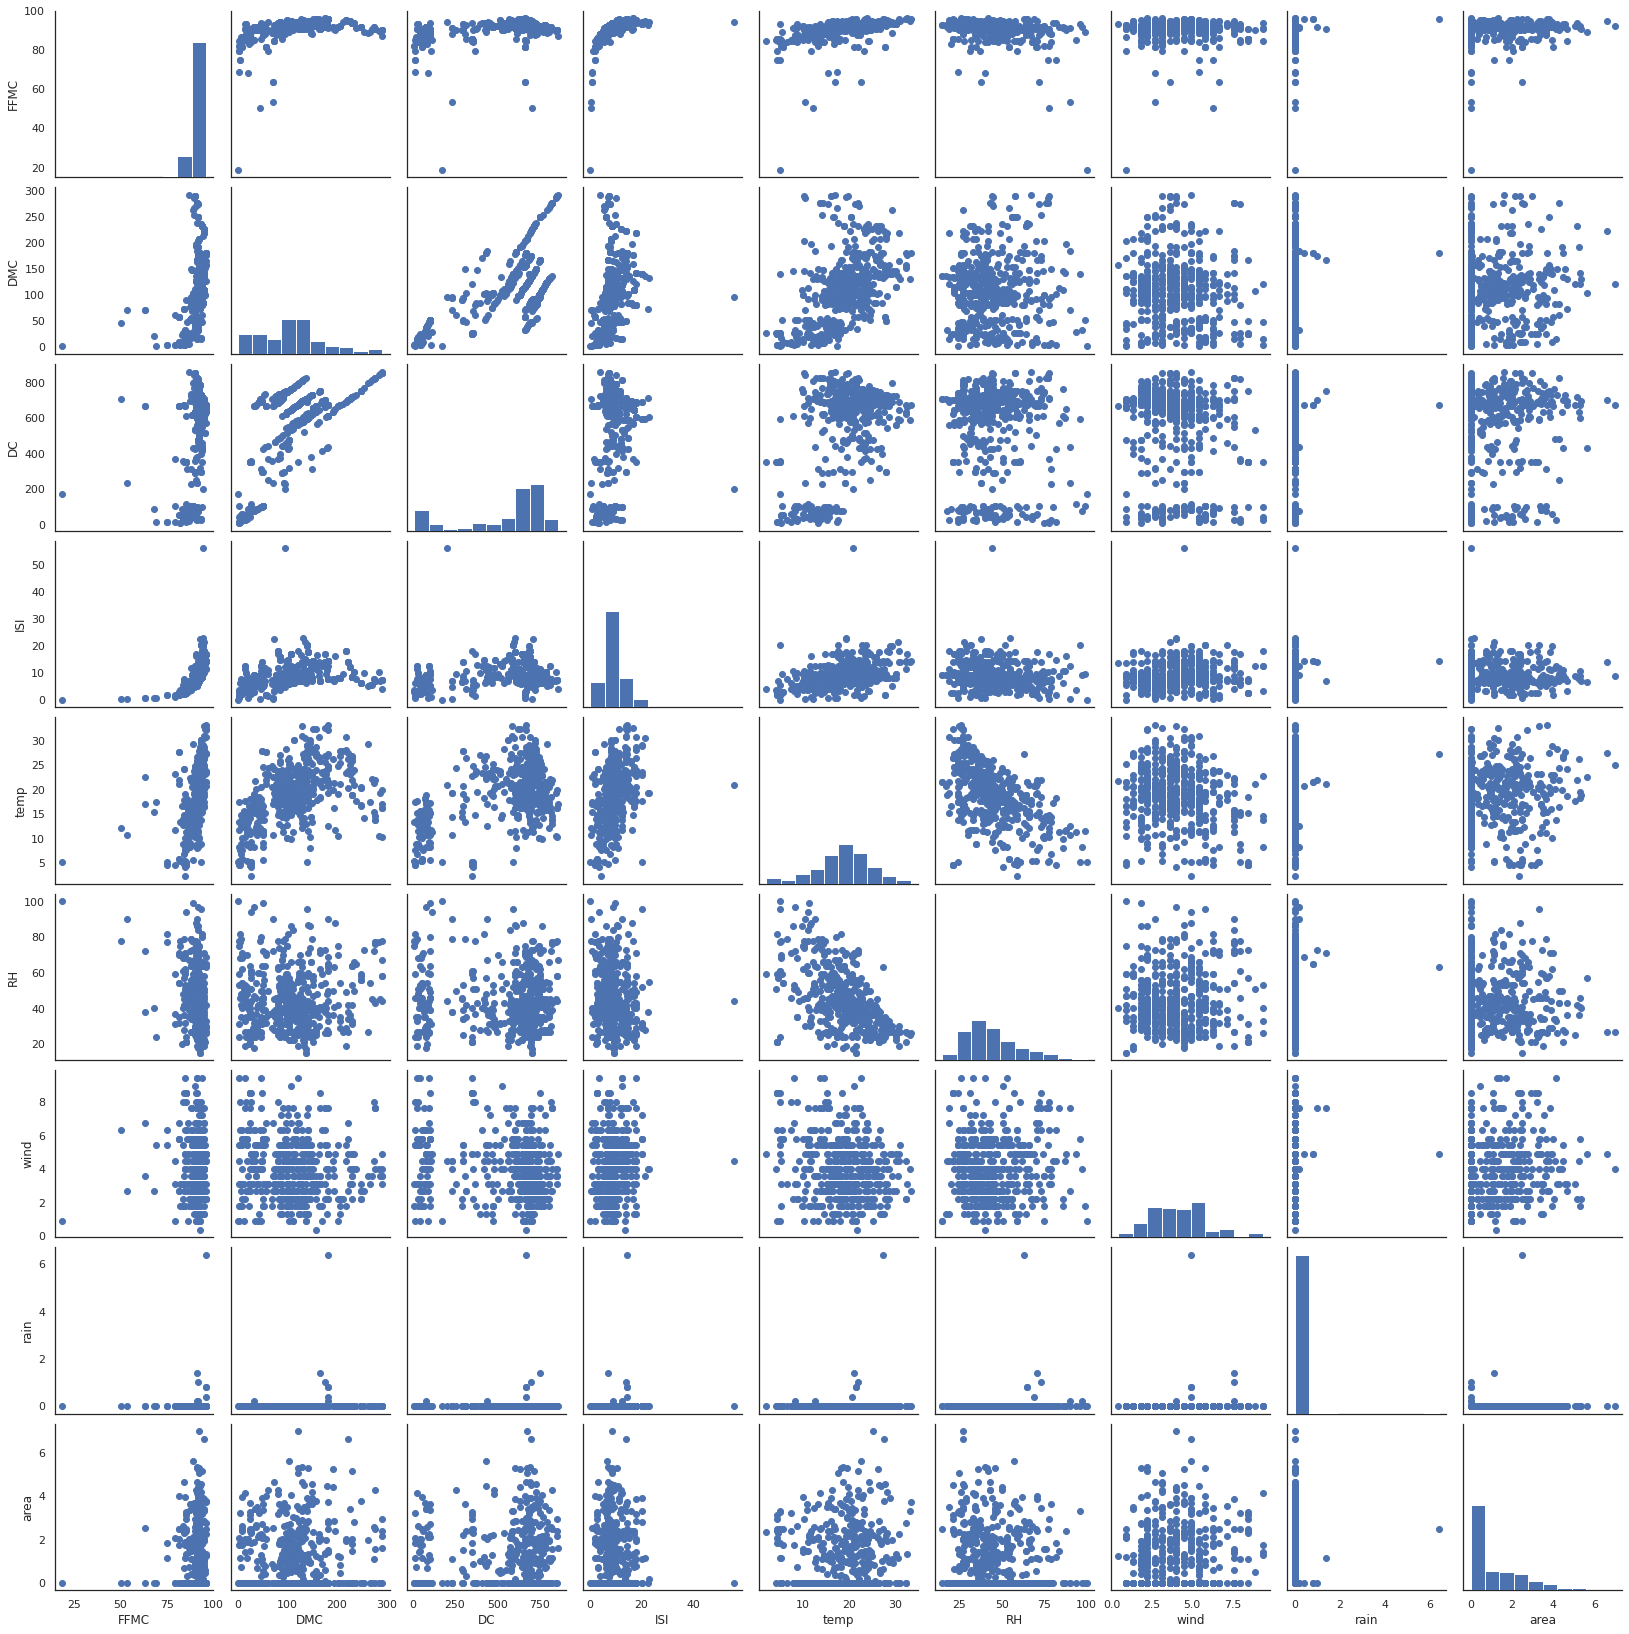

In [18]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain',"area"]
sns.set(style="white")

g = sns.PairGrid(Data[ncols])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

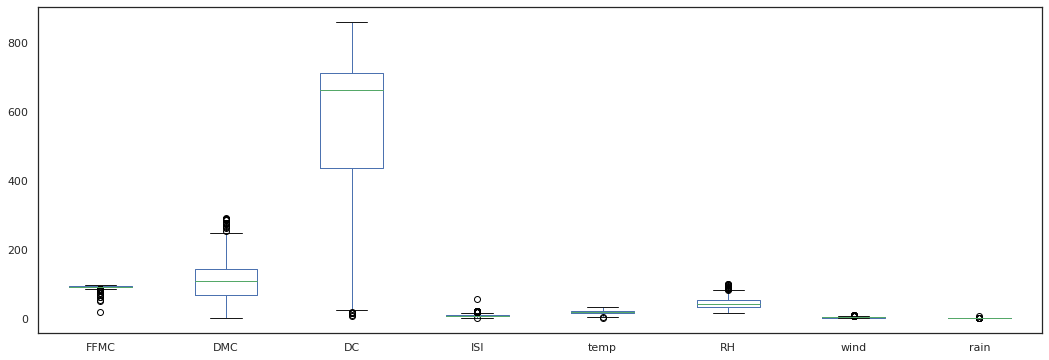

In [19]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
Data[ncols].plot(kind="box", figsize=(18,6))

In [22]:
allcols=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']

ztrans_data=Data[['X', 'Y', 'month', 'day']]
col_zscores=[]

for col in ncols:
    col_zscore = col + '_zscore'
    ztrans_data[col_zscore] = (Data[col] - Data[col].mean())/Data[col].std(ddof=0)
    col_zscores.append(col_zscore)
    print(ztrans_data[col_zscore])

0     -0.805959
1     -0.008102
2     -0.008102
3      0.191362
4     -0.243833
         ...   
512   -1.640083
513   -1.640083
514   -1.640083
515    0.680957
516   -2.020879
Name: FFMC_zscore, Length: 517, dtype: float64
0     -1.323326
1     -1.179541
2     -1.049822
3     -1.212361
4     -0.931043
         ...   
512   -0.846648
513   -0.846648
514   -0.846648
515    0.549003
516   -1.685913
Name: DMC_zscore, Length: 517, dtype: float64
0     -1.830477
1      0.488891
2      0.560715
3     -1.898266
4     -1.798600
         ...   
512    0.474768
513    0.474768
514    0.474768
515    0.269382
516   -1.780442
Name: DC_zscore, Length: 517, dtype: float64
0     -0.860946
1     -0.509688
2     -0.509688
3     -0.004756
4      0.126966
         ...   
512   -1.563460
513   -1.563460
514   -1.563460
515    0.500176
516   -1.739089
Name: ISI_zscore, Length: 517, dtype: float64
0     -1.842640
1     -0.153278
2     -0.739383
3     -1.825402
4     -1.291012
         ...   
512    1.536084


In [23]:
for col in ncols:
    print(col+ ' column has  '+str(len(Data[np.abs(ztrans_data[col+"_zscore"])>3][col]))+" outliers")
    Data[np.abs(ztrans_data[col+"_zscore"])>3][col]=Data[col].median()

FFMC column has  7 outliers
DMC column has  0 outliers
DC column has  0 outliers
ISI column has  2 outliers
temp column has  0 outliers
RH column has  5 outliers
wind column has  4 outliers
rain column has  3 outliers


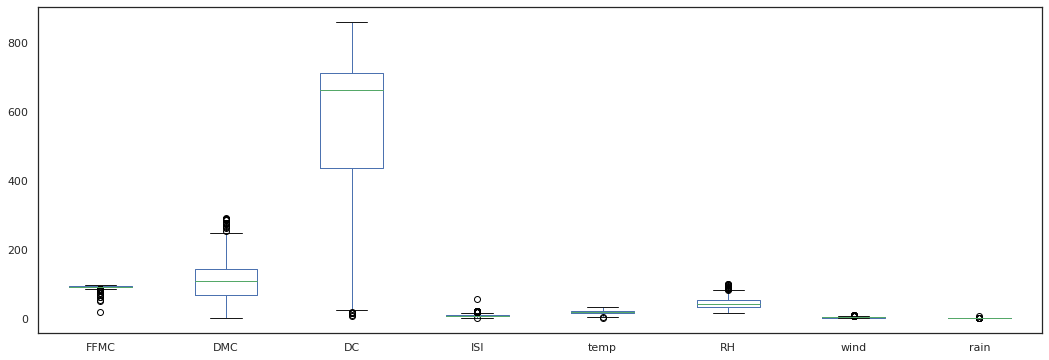

In [24]:
Data[ncols].plot(kind="box", figsize=(18,6))

In [ ]:
#Encoding the categorical columns
dummies= pd.get_dummies(Data['day'])
Encoded_Data=Data.join(dummies)
#Data1=Data1.rename(index=str, columns=renames('day_',Data['day'].max()+1))

dummies= pd.get_dummies(Data['month'])
Encoded_Data=Encoded_Data.join(dummies)
#Data1=Data1.rename(index=str, columns=renames('month_',Data['month'].max()+1))

dummies= pd.get_dummies(Data['X'])
Encoded_Data=Encoded_Data.join(dummies)
Encoded_Data=Encoded_Data.rename(index=str, columns=renames('X_',Data['X'].max()+1))

dummies= pd.get_dummies(Data['Y'])
dummies=dummies.rename(index=str, columns=renames('Y_',Data['Y'].max()+1))
Encoded_Data=Encoded_Data.join(dummies)

Encoded_Data=Encoded_Data.drop(columns=['day','month','X','Y','fri', 'dec'])

#print(Encoded_Data.columns)
#Encoded_Data.head()

Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2',       'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4',       'Y_5', 'Y_6', 'Y_8', 'Y_9']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Encoded_Data[Encod_ncols], Encoded_Data["area"],  test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

-0.030117548659267523

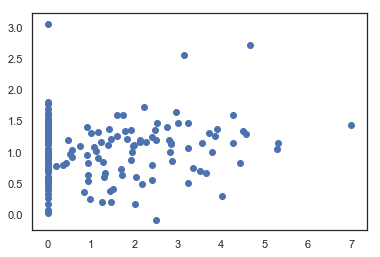

In [ ]:
pred=model.predict(X_test)
from sklearn.metrics import r2_score
plt.scatter(y_test,pred)
r2_score(y_test,pred)

In [ ]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test,pred)

1.0592798635404128

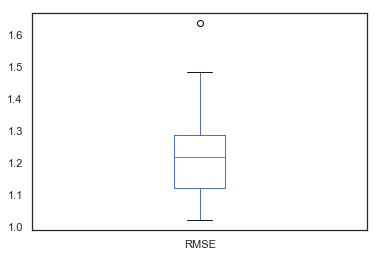

In [ ]:
scores = cross_val_score(model, Encoded_Data[Encod_ncols], Encoded_Data["area"], cv=10, scoring="neg_mean_squared_error")
scores=np.sqrt(abs(scores))
pd.Series(np.sqrt(scores) ).plot(kind="box", label="RMSE")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data[ncols], Data["area"],  test_size=0.40, random_state=0)

In [ ]:
from sklearn import tree
model2 = tree.DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

-1.0172746738719933

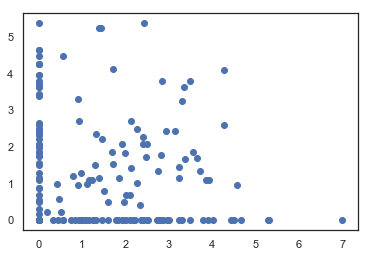

In [ ]:
pred=model2.predict(X_test)
from sklearn.metrics import r2_score
plt.scatter(y_test,pred)
r2_score(y_test,pred)

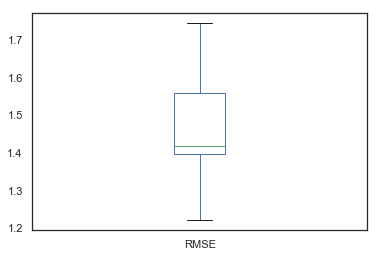

In [ ]:
scores = cross_val_score(model2, Data[ncols], Data["area"], cv=10, scoring="neg_mean_squared_error")
scores=np.sqrt(abs(scores))
pd.Series(np.sqrt(scores) ).plot(kind="box", label="RMSE")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

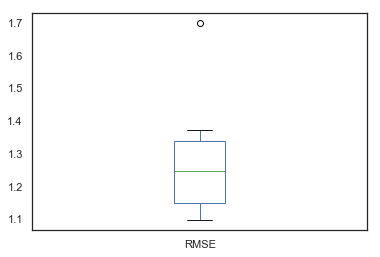

In [ ]:
scores = cross_val_score(model3, Data[ncols], Data["area"], cv=10, scoring="neg_mean_squared_error")
scores=np.sqrt(abs(scores))
pd.Series(np.sqrt(scores)).plot(kind="box", label="RMSE")

-1.0172746738719933

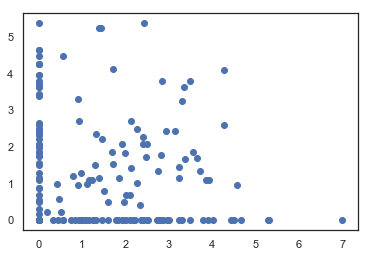

In [ ]:
pred=model2.predict(X_test)
from sklearn.metrics import r2_score
plt.scatter(y_test,pred)
r2_score(y_test,pred)